## Alternate Domains

#### Config

In [1]:
## packages
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
ROOT = os.environ.get('ROOT', '')
SAVE = bool(os.environ.get('SAVE', True))

## toolkit
from src.triangulations import tri_maze, tri_sphere, tri_torus
from src.fem import build_matricies, solve_fem

## config
tmax = 1000
dt = 0.01
triN = 16
L = 10
np.random.seed(0)

#### PDE

In [2]:
## pde config
N = 2
gamma = np.array([1, 0.02])
k1 = 9
k2 = 11
r = lambda u: np.column_stack((
        k1 * (u[:, 1] - u[:, 0] * u[:, 1] / (1 + u[:, 1]**2)),
        k2 - u[:, 1] - 4 * u[:, 0] * u[:, 1] / (1 + u[:, 1]**2),
    ))

#### Maze

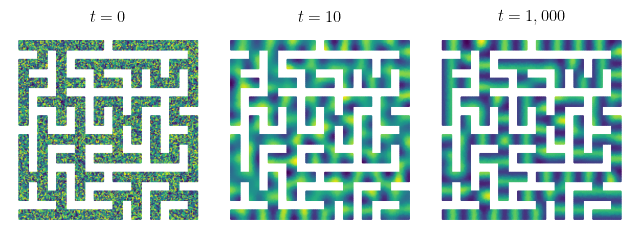

In [3]:
## triangulate the domain
mn = 10
pts, tris = tri_maze(mn, mn, L / (2 * mn - 1), triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)

## initial condition
u0 = np.random.uniform(-1, 1, (n_pts, N))

## plot it
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(6.5)
fig.set_figheight(2.5)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# t = 0
axs[0].set_title('$t = 0$')
axs[0].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u0[:, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 10
u = solve_fem(r, gamma, 10, dt, u0, damp_mat, stiff_mat)
axs[1].set_title('$t = 10$')
axs[1].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[:, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 1000
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)
axs[2].set_title(f'$t = {tmax:,}$')
axs[2].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[:, 0],
        triangles=tris,
        shading='gouraud',
    )

## final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/maze_ts.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs

#### Sphere

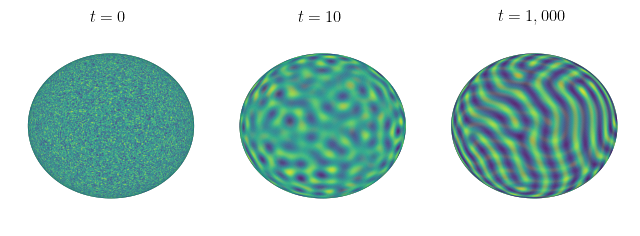

In [4]:
## triangulate the domain
pts, tris = tri_sphere(L / 2, 7)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)

## solve the system
u0 = np.random.uniform(-1, 1, (n_pts, N))

## plot it
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'})
fig.set_figwidth(6.5)
fig.set_figheight(2.5)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# t = 0
axs[0].set_title('$t = 0$')
tri_cols = u0[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[0].add_collection3d(mesh)

# t = 10
u = solve_fem(r, gamma, 10, dt, u0, damp_mat, stiff_mat)
axs[1].set_title('$t = 10$')
tri_cols = u[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[1].add_collection3d(mesh)

# t = 1000
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)
axs[2].set_title(f'$t = {tmax:,}$')
tri_cols = u[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[2].add_collection3d(mesh)

## final things
for ax in axs:
    ax.set_xlim([x / 1.5 for x in ax.get_xlim()])
    ax.set_ylim([x / 1.5 for x in ax.get_ylim()])
    ax.set_zlim([x / 1.5 for x in ax.get_zlim()])
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/sphere_ts.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs

#### Torus

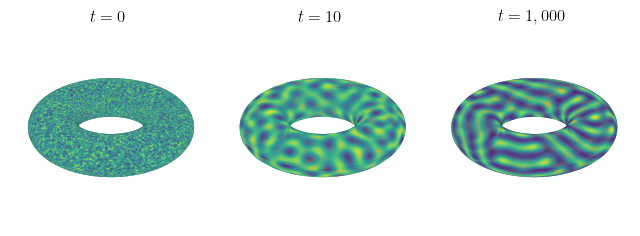

In [5]:
## triangulate the domain
pts, tris = tri_torus(1.5, L / 2 - 1.5, triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)

## solve the system
u0 = np.random.uniform(-1, 1, (n_pts, N))
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)

## plot it
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'})
fig.set_figwidth(6.5)
fig.set_figheight(2.5)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# t = 0
axs[0].set_title('$t = 0$')
tri_cols = u0[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[0].add_collection3d(mesh)

# t = 10
u = solve_fem(r, gamma, 10, dt, u0, damp_mat, stiff_mat)
axs[1].set_title('$t = 10$')
tri_cols = u[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[1].add_collection3d(mesh)

# t = 1000
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)
axs[2].set_title(f'$t = {tmax:,}$')
tri_cols = u[:, 0][tris].mean(axis=1)
color = (tri_cols - tri_cols.min()) / (tri_cols.max() - tri_cols.min())
mesh = Poly3DCollection(
        pts[tris],
        facecolors=plt.cm.viridis(color),
    )
axs[2].add_collection3d(mesh)

## final things
for ax in axs:
    ax.set_xlim([x / 1.5 for x in ax.get_xlim()])
    ax.set_ylim([x / 1.5 for x in ax.get_ylim()])
    ax.set_zlim(ax.get_xlim())
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/torus_ts.pdf', bbox_inches='tight')

# memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs